# Flare 2014/06/10

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import sys
sys.path.append('D:/solar flares/data/2017-09-06')
import use_nessi3 as un

ModuleNotFoundError: No module named 'use_nessi3'

In [ ]:
import os

# Specify the path to the folder you want to list files from
folder_path = "D:/solar flares/data/2014-06-10/fits/Ha/"

# Get a list of all files and directories in the specified path
file_list = os.listdir(folder_path)
file_list.sort()
# Print the names of files and directories
print(f"{len(file_list)} Files in '{folder_path}':")
for item in file_list:
    print(item)

def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= 270:
        raise IndexError(f'frame number {frame} is not in (0, 270).')
    else:
        return folder_path + file_list[frame]
ttff = timeframe_to_filename_fits



270 Files in 'D:/solar flares/data/2014-06-10/fits/Ha/':
sst.crisp_halpha_10Jun2014_12_39_53.fits
sst.crisp_halpha_10Jun2014_12_39_57.fits
sst.crisp_halpha_10Jun2014_12_40_01.fits
sst.crisp_halpha_10Jun2014_12_40_05.fits
sst.crisp_halpha_10Jun2014_12_40_09.fits
sst.crisp_halpha_10Jun2014_12_40_13.fits
sst.crisp_halpha_10Jun2014_12_40_17.fits
sst.crisp_halpha_10Jun2014_12_40_21.fits
sst.crisp_halpha_10Jun2014_12_40_25.fits
sst.crisp_halpha_10Jun2014_12_40_29.fits
sst.crisp_halpha_10Jun2014_12_40_33.fits
sst.crisp_halpha_10Jun2014_12_40_37.fits
sst.crisp_halpha_10Jun2014_12_40_41.fits
sst.crisp_halpha_10Jun2014_12_40_45.fits
sst.crisp_halpha_10Jun2014_12_40_49.fits
sst.crisp_halpha_10Jun2014_12_40_53.fits
sst.crisp_halpha_10Jun2014_12_40_57.fits
sst.crisp_halpha_10Jun2014_12_41_01.fits
sst.crisp_halpha_10Jun2014_12_41_05.fits
sst.crisp_halpha_10Jun2014_12_41_09.fits
sst.crisp_halpha_10Jun2014_12_41_13.fits
sst.crisp_halpha_10Jun2014_12_41_17.fits
sst.crisp_halpha_10Jun2014_12_41_21.fits


In [ ]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    wvl = io[0].data
    print(np.shape(wvl))
    print(np.average(wvl))

wvl = np.array([6561.96799994, 6562.22599995, 6562.48399997, 6562.74199998, 6563.00000000, 6563.25800002, 6563.51600003, 
       6563.77400005, 6564.03200006])
np.save('line_data/wav_sstHa.npy', wvl)

(9, 1424, 1424)
390142.12


In [ ]:
head0 = f.getheader(ttff(0))
head7 = f.getheader(ttff(7))
head0

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                  -32 /bits per data value                             
NAXIS   =                    3 /number of axes                                  
NAXIS1  =                 1424 /                                                
NAXIS2  =                 1424 /                                                
NAXIS3  =                    9 /                                                
EXTEND  =                    T /file may contain extensions                     
DATE    = '2014-06-10'         / observation date                               
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
NUMLINES=                    9 / no. of spectral line positions in CRISP scan   
LINE    = '      6563.00'      / spectral line observed                         
TIME    = '12:39:53'        

In [ ]:
f1 = ttff(0)
f1.split('.')[1][-8:].replace('_', ':')

'12:39:53'

In [ ]:
def filname_to_time(fname):
    return fname.split('.')[1][-8:].replace('_', ':')
time_list = [filname_to_time(fname) for fname in file_list]
time_list

['12:39:53',
 '12:39:57',
 '12:40:01',
 '12:40:05',
 '12:40:09',
 '12:40:13',
 '12:40:17',
 '12:40:21',
 '12:40:25',
 '12:40:29',
 '12:40:33',
 '12:40:37',
 '12:40:41',
 '12:40:45',
 '12:40:49',
 '12:40:53',
 '12:40:57',
 '12:41:01',
 '12:41:05',
 '12:41:09',
 '12:41:13',
 '12:41:17',
 '12:41:21',
 '12:41:25',
 '12:41:29',
 '12:41:33',
 '12:41:36',
 '12:41:40',
 '12:41:44',
 '12:41:48',
 '12:41:52',
 '12:41:56',
 '12:42:00',
 '12:42:04',
 '12:42:08',
 '12:42:12',
 '12:42:16',
 '12:42:20',
 '12:42:24',
 '12:42:28',
 '12:42:32',
 '12:42:36',
 '12:42:40',
 '12:42:44',
 '12:42:48',
 '12:42:52',
 '12:42:56',
 '12:43:00',
 '12:43:04',
 '12:43:08',
 '12:43:12',
 '12:43:16',
 '12:43:20',
 '12:43:24',
 '12:43:27',
 '12:43:31',
 '12:43:35',
 '12:43:39',
 '12:43:43',
 '12:43:47',
 '12:43:51',
 '12:43:55',
 '12:43:59',
 '12:44:03',
 '12:44:07',
 '12:44:11',
 '12:44:15',
 '12:44:19',
 '12:44:23',
 '12:44:27',
 '12:44:31',
 '12:44:35',
 '12:44:39',
 '12:44:43',
 '12:44:47',
 '12:44:51',
 '12:44:55',

In [ ]:
def datacube(timeframe):
    if timeframe < 270 and timeframe >= 0:
        return f.getdata(ttff(timeframe))
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames 270."
        )

In [ ]:
print(np.any(np.isnan(datacube(0)[0,:,:])))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

False
the maximum attained value in frame 0 is 4419737.0 and the 98 percile is 1797185.5


array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         6.03130176e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 4.61891846e+03, 5.77344873e+03,
         6.32965137e+03, 6.90138818e+03, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.50395874e+03, 5.50087891e+03, 7.83832373e+03,
         7.35948096e+03

D:/solar flares/data/2014-06-10/fits/Ha/sst.crisp_halpha_10Jun2014_12_39_53.fits
s=(9, 1424, 1424)
the shape of the data is (270, 1, 9, 1424, 1424)
the wavelengths are self._wavel = array([6561.96799994, 6562.22599995, 6562.48399997, 6562.74199998,
       6563.        , 6563.25800002, 6563.51600003, 6563.77400005,
       6564.03200006])
(1424, 1424) (1424, 1424)
Boundary
Blue=Outside, yellow=Inside


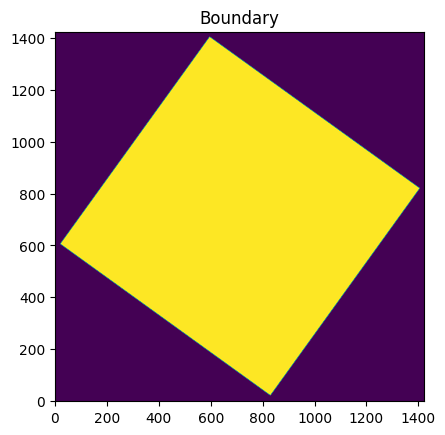

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
reload(un)
Ha = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHa.npy', number_of_frames=270,
                 time=time_list, name_of_line='Ha14', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search', 
                 boundary_arguments = {"error":0.001})

# Ha.datacube
# np.shape(Ha.datacube), Ha.datacube(0)[0:30:5,10:20:5, 100:200:30], 
Ha.boundary


In [ ]:
# Ha.calculate__FOV_spect_over_time()

In [ ]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Ha.shape=}')

the mean cadence is 3.9665427509293614 seconds for this line!
Ha.shape=(270, 1, 9, 1424, 1424)


[[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]
The guessed filters are [[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]


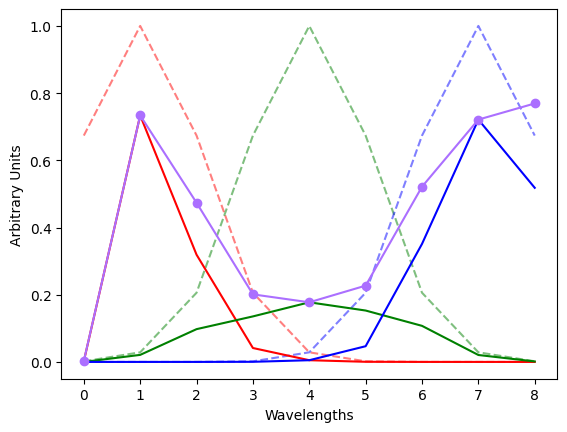

In [ ]:
# %matplotlib inline
gf = un.guess_filters(9)
print(gf)
Ha.update_filters(None)# [[3,2], [7,2], [11,2]]
Ha.plot_filt(880,900)
plt.show()

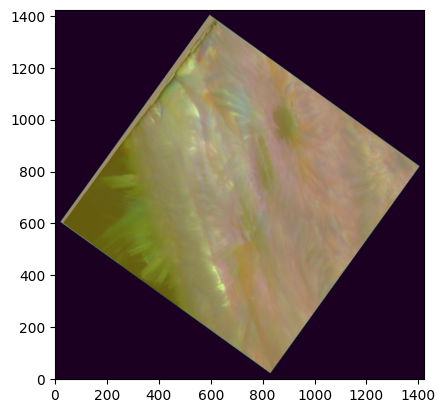

(1424, 1424, 3)


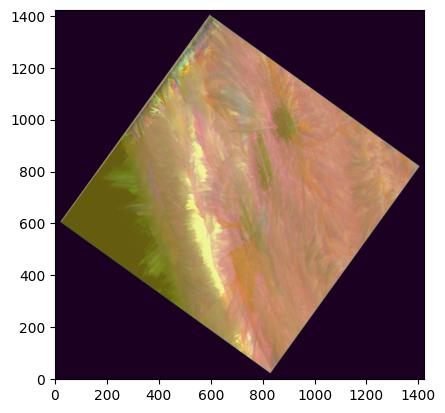

(1424, 1424, 3)


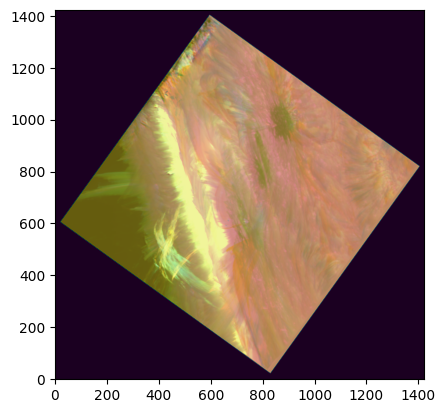

(1424, 1424, 3)


In [ ]:
# %matplotlib widget
for frame in range(0,Ha._number_of_frames, 100):
    # frame=0
    Ha.ccp_frame(frame,Show=False)
    plt.imshow(Ha.current_ccp, origin='lower')
    plt.imshow(Ha.calculate_boundary(frame=frame), alpha=0.4, origin="lower")

    # plt.imshow(Ha.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Ha.current_ccp))#,np.shape(Ha.boundary))

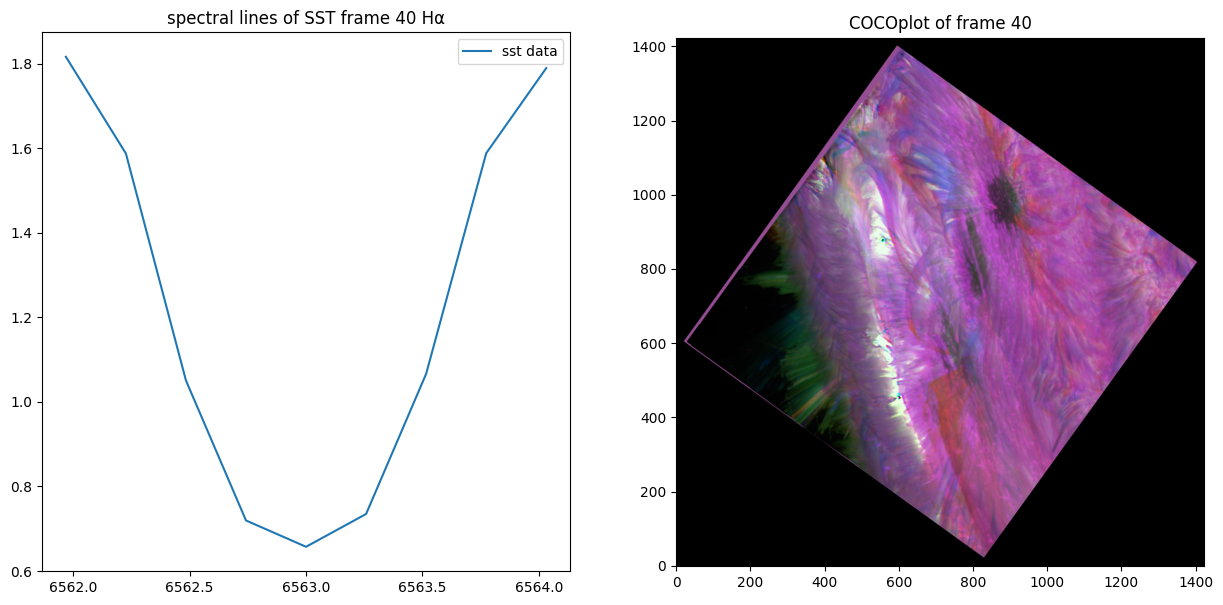

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
Ha.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Ha.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()


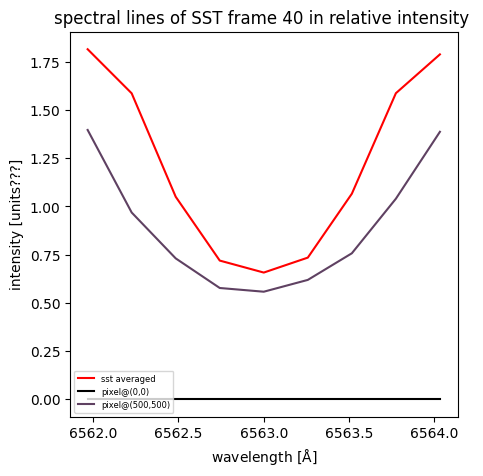

In [ ]:
Ha.current_ccp[0:30:10,0:60:20,:]
Ha.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

In [ ]:
print('Updated sys.path:', sys.path)
atlas = f.getdata('D:/solar flares/data/2017-09-06/fits/solar_atlas_V1_405-1065.fits')
atlas

Updated sys.path: ['e:\\solar flares\\data\\2014-06-10', 'c:\\Users\\Gebruiker\\Anaconda3\\python311.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin', 'D:/solar flares/data/2017-09-06']


array([0.91304463, 0.91184324, 0.88306457, ..., 1.0017935 , 1.0030575 ,
       1.0040228 ], dtype='>f4')

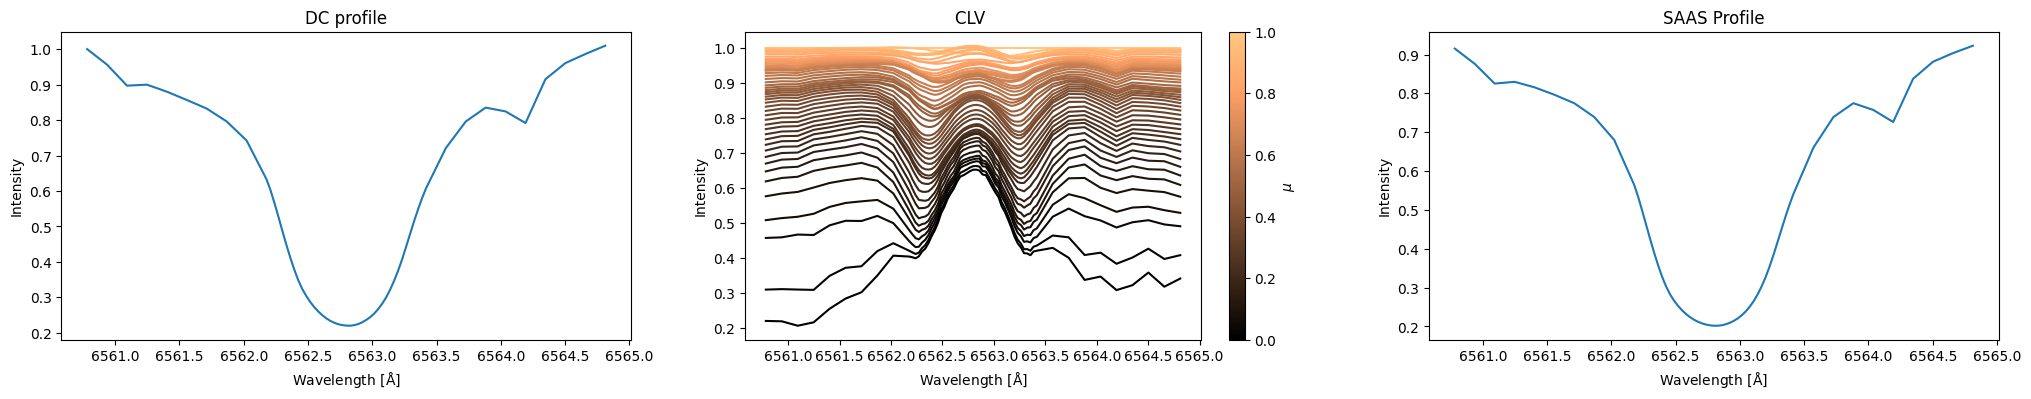

crisp::read_reflectivity: (RL,RH)[6562.797056366136] = (0.8491633356704921, 0.9329974862402864)


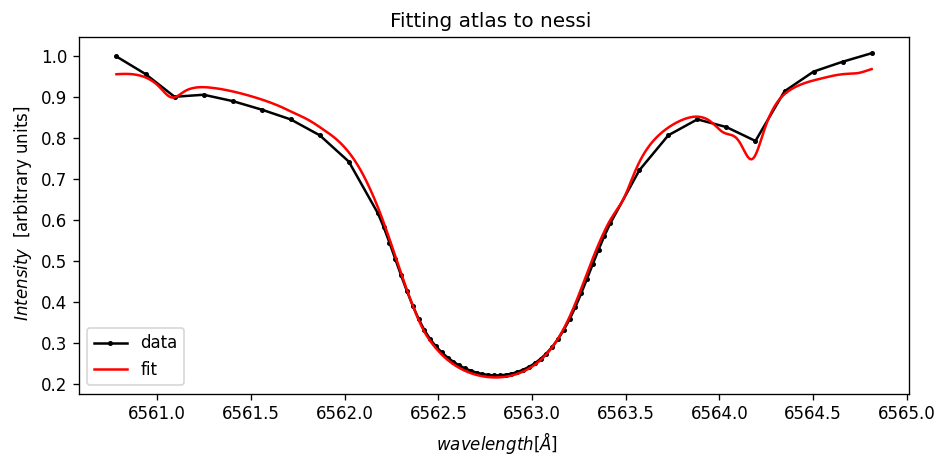

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 109.18617274594173
        x: [-1.830e+00  4.655e-03  1.176e+00]
      nit: 7
      jac: [ 5.846e-02 -2.979e+02  0.000e+00]
 hess_inv: [[ 3.833e-06 -1.139e-08  0.000e+00]
            [-1.139e-08  7.112e-11  0.000e+00]
            [ 0.000e+00  0.000e+00  1.000e+00]]
     nfev: 432
     njev: 106
de p-waarde is  1.0 
Chi^2 reduced= 1.9497530847489595 
aantal vrijheidgraden= 56 
chi^2= 109.18617274594173
we behouden de fit tot op een betrouwbaarheidsniveau van  1.0 
Oftewel verwerp als p-waarde <lpha-niveau 


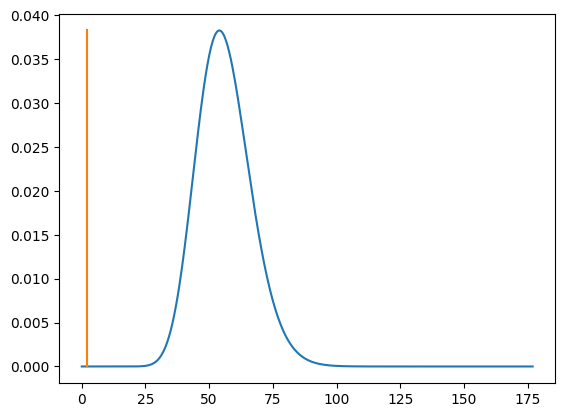

6183


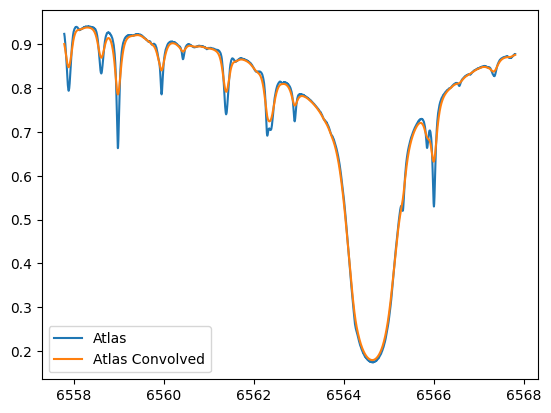

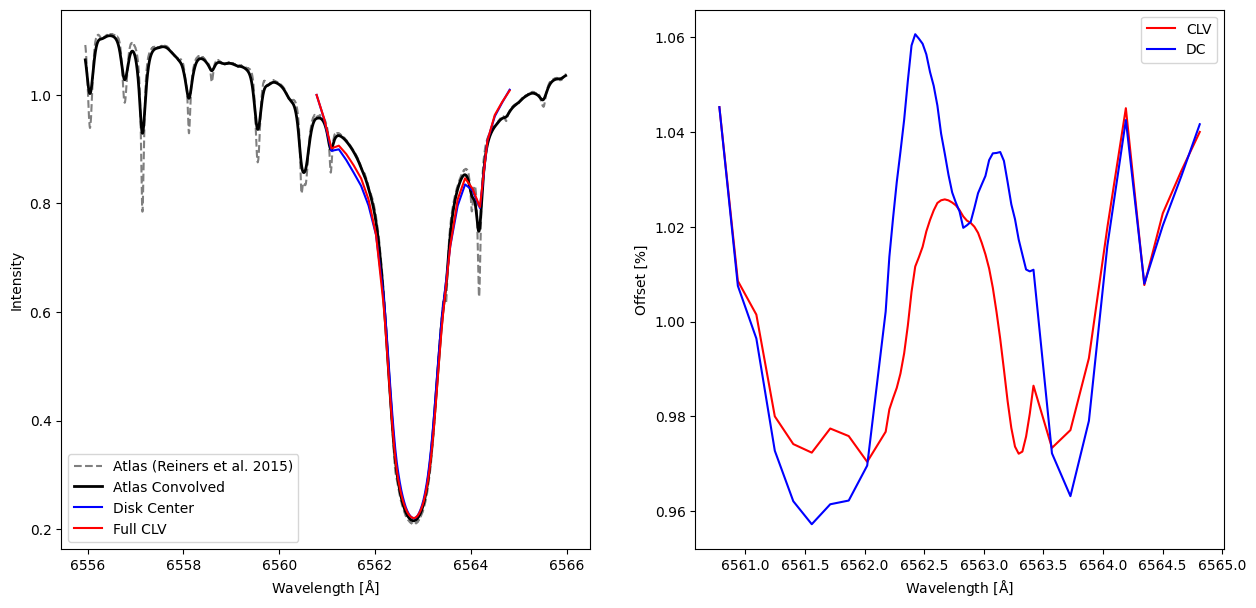

6562.797056366136 6562.797056366135


In [ ]:
reload(un)
theor_Ha = un.linestudier('D:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=atlas, nr=101)
theor_Ha.saas_profile_atlas_check(show_all=True)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

## Calculating the $\mu$ !!!!! 


In [ ]:
Ha.shape

(270, 1, 9, 1424, 1424)

In [ ]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Ha.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        # print(add_enters(str(hdu.header), length_row=79))
        try: 
            print("x =", hdu.header['CRVAL1'], "y=", hdu.header['CRVAL2'])
        except KeyError:
            pass

# there is no coordinate information present! We take the mu from Beam electrons as a source of H&alpha; flare ribbons

x = -878.852300514 y= -304.754577918


z=972.0082304178293, width = 114.27063735072942
[-935.9876191893648, -821.7169818386353, -361.8898965933647, -247.61925924263528]
does MU contain nan's? True


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_10584\1068542446.py:11: RuntimeWarning: invalid value encountered in sqrt
  mu  = (1-(x**2 + y**2)/radius**2)**0.5


AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.13964009070919234 for timeframe 10
Coundourplot succesfully saved.


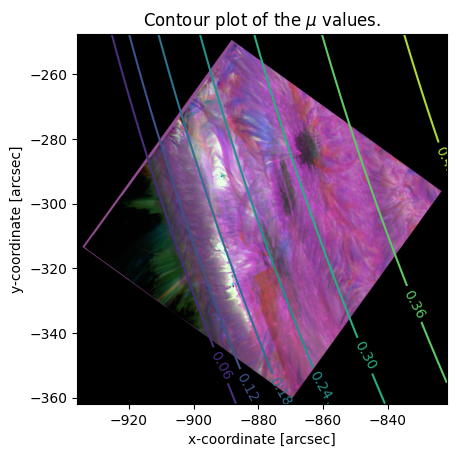

In [ ]:
def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

# 60 arcsec is de zijde van (20,600) tot (800, 20) pixels op 1424x1242 pixles
# by pythagoras 
z = ((800-20)**2 + (600-20)**2 )**0.5
width = 60 * 1424/z*1.3
print(f"{z=}, {width = }")

position = (-878.852300514, -304.754577918)

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], Ha.shape[4])
y = np.linspace(fyp[0], fyp[1], Ha.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=Ha, save=True, save_name=Ha.name_of_line, timeFrame=10)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


0.0021844707726810238


c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:382: RuntimeWarning: invalid value encountered in sqrt
  ipts = _np.vstack([_np.atleast_2d(x), _np.atleast_2d(y), _np.atleast_2d(_np.sqrt(1.-(x**2+y**2)))])
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:358: RuntimeWarning: invalid value encountered in arcsin
  mu = _np.cos(_np.arcsin(rad_dist))


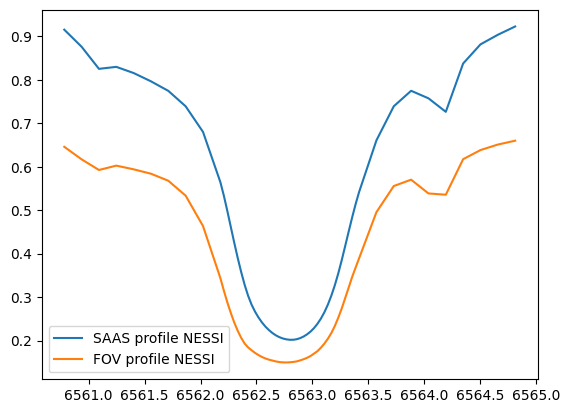

In [ ]:
theor_Ha.set_fov( xx, yy, Ha.boundary, sr=959.63)

When we were scaling the width by 1.3:

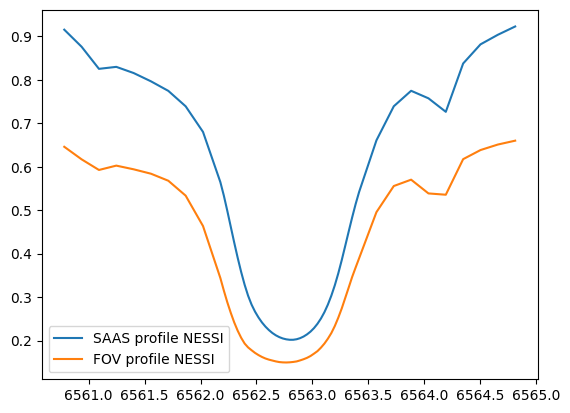

## Finding a suitable quiet sun patch

In [ ]:
frame, Ha.shape

(40, (270, 1, 9, 1424, 1424))

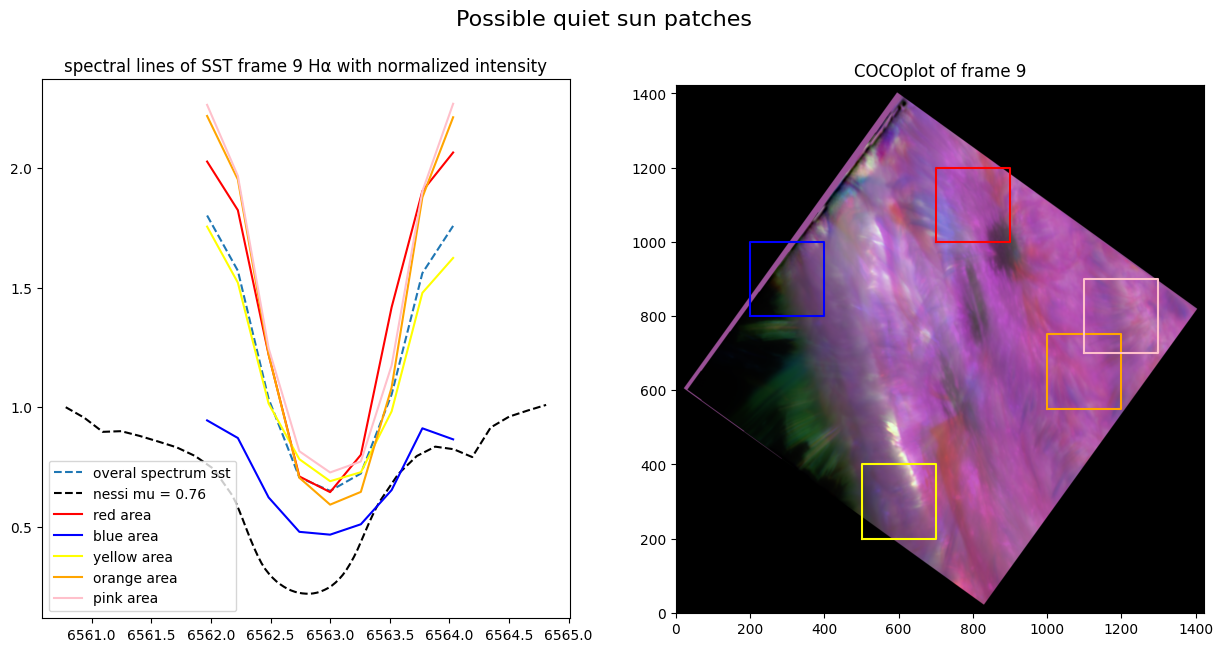

In [ ]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Ha.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(700,900),(1000,1200)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc*theor_Ha.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Ha.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Ha._wavel, Ha.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')
plt.show()


### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [ ]:
color_wanted_patch = 'pink'

the edges of the patch are denoted by the xlim: (1100, 1300) and ylim: (700, 900)


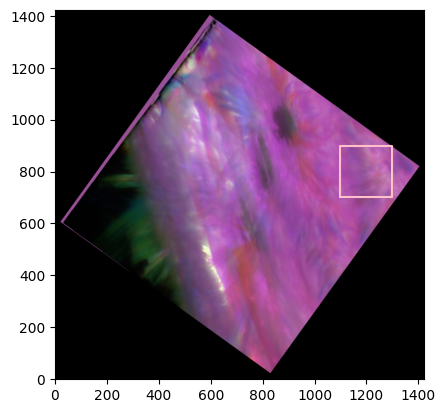

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

In [ ]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
Ha.quiet_sun

In [ ]:
profs = theor_Ha.saas.get_spectra()

In [ ]:
len(profs)

31316

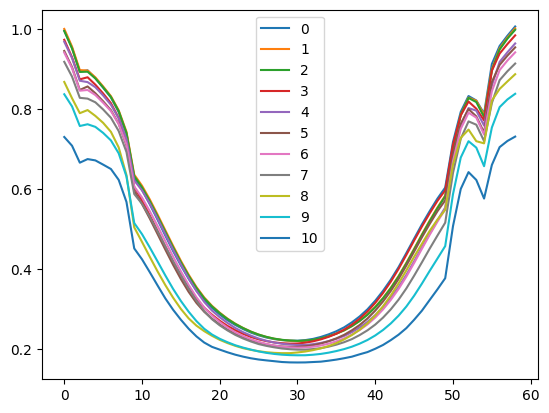

In [ ]:
hj = 3000
for i, p in enumerate(profs):
    if i%hj == 0:
        plt.plot(p, label=str(i//hj))
plt.legend()

In [ ]:
sr = 959.63
xc = xx/sr
yc = yy/sr
rad_dist = np.atleast_1d(np.sqrt(xc.flatten()**2+yc.flatten()**2))
mu = np.cos(np.arcsin(rad_dist))
print(mu)
np.nanmean(mu), (xc[-1,-1]-xc[0,0]) * (yc[-1,-1]-yc[0,0])

[0.99999941 0.99999941 0.99999941 ... 0.99999957 0.99999957 0.99999957]


(0.9999994885627812, 1.5397635464915367e-08)

In [ ]:
sr = 959.63
a, b = xlim
c, d = ylim
xc = (xx/sr)[a:b]
yc = (yy/sr)[c:d]
rad_dist = np.atleast_1d(np.sqrt(xc.flatten()**2+yc.flatten()**2))
mu = np.cos(np.arcsin(rad_dist))
print(mu)
np.nanmean(mu), (xc[-1,-1]-xc[0,0]) * (yc[-1,-1]-yc[0,0])

[0.99999943 0.99999943 0.99999943 ... 0.99999955 0.99999955 0.99999955]


(0.9999994917026326, 2.1532884451989888e-09)

The quiet sun is pick at x (-839.6646188364484, -297.68794679581856) with average              mu 0.37170585085462843


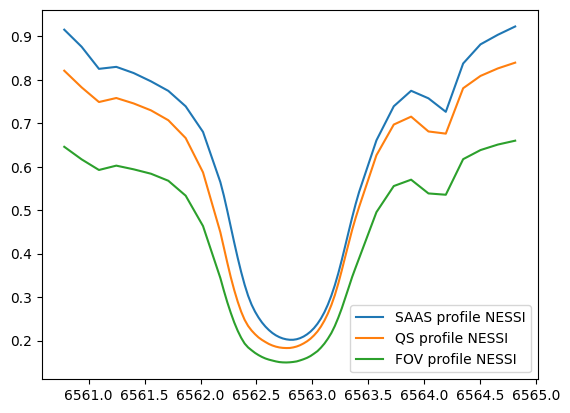

In [ ]:
theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim)


In [ ]:
def fit_qs_to_NESSI(theor_line, sst_data):
    import data_analysis as da
    # theta = [horizontale translatie, verticale translatie, verticale schaalfactor]
    # theta = [0.2, 0.3, 0.89]

    f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.spectr_qs + theta[1]
                                    , kind='linear', fill_value="extrapolate")
    f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.spectr_fov + theta[1]
                                    , kind='linear', fill_value="extrapolate")
    f_nessi_saas = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.saas_profile + theta[1]
                                    , kind='linear', fill_value="extrapolate")
    g = len(sst_data._wavel)

    #To simulate a specific domain around the well we cam make the errors on the wings huge
    avs = sst_data.frame_integrated_spect(sst_data.quiet_sun['frame'], sst_data.quiet_sun['xlim'], sst_data.quiet_sun['ylim'], variation=True)
    stds = sst_data.var_spect
    print(sst_data._wavel)
    data = [sst_data._wavel,  avs ,stds,np.zeros(g)+0.01]
    initial_guess = np.array([np.median(sst_data._wavel) - np.median(theor_line.sst_wav), 0, np.average(avs)/np.average(theor_line.spectr_qs)])

    mini = da.optimalisatie(data, model=f_nessi_qs, beginwaarden=initial_guess, fout_model=None, plot=False)
    print(mini)
    theta = mini['x']
    sst_data.theta_nessi_to_quiet_sun = theta
    theor_Ha.theta_nessi_to_quiet_sun = theta
    da.plot_fit(
        data,
        model=f_nessi_qs,
        theta0=theta,
        titel="SST quiet sun patch vs nessi (fit)",
        labelx="wavelength $[\AA]$",
        labely=" Intensity []",
        error=False,
    )
    da.kwaliteit_fit(data, mini)

    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
    # fig.setitle("quiet sun determination, weiging constants")

    fig.suptitle('The gauge of the quiet sun spectrum', fontsize=16)

    sst_data.ccp_frame(frame,Show=False)

    ax[0].set_title(
        f"spectral lines of SST frame {str(frame)}  with normalized intensity"
    )
    sst_data.frame_integrated_spect(frame)
    ax[0].plot(sst_data._wavel, sst_data.av_spect, label='sst FOV')
    ax[0].plot(sst_data._wavel, sst_data.quiet_spect, label='sst quiet sun') #

    ax[0].plot(theor_line.sst_wav + theta[0], f_nessi_saas(theta)(theor_line.sst_wav + theta[0]), label='NESSI saas')
    ax[0].plot(theor_line.sst_wav + theta[0], f_nessi_qs(theta)(theor_line.sst_wav + theta[0]), label='NESSI QS')
    ax[0].plot(theor_line.sst_wav + theta[0], f_nessi_fov(theta)(theor_line.sst_wav + theta[0]), label='NESSI FOV')
    ax[0].legend()
    ax[1].imshow(sst_data.current_ccp, origin='lower')
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color_wanted_patch)
    ax[1].set_title(f"COCOplot of frame {str(frame)}")
    plt.show()

[6561.96799994 6562.22599995 6562.48399997 6562.74199998 6563.
 6563.25800002 6563.51600003 6563.77400005 6564.03200006]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 110.29448474185678
        x: [ 2.557e-01  1.498e-01  2.991e+00]
      nit: 14
      jac: [ 2.861e-06  9.537e-07  1.240e-05]
 hess_inv: [[ 3.165e-06  5.160e-07 -1.720e-08]
            [ 5.160e-07  7.029e-06 -2.343e-07]
            [-1.720e-08 -2.343e-07  7.842e-09]]
     nfev: 186
     njev: 45


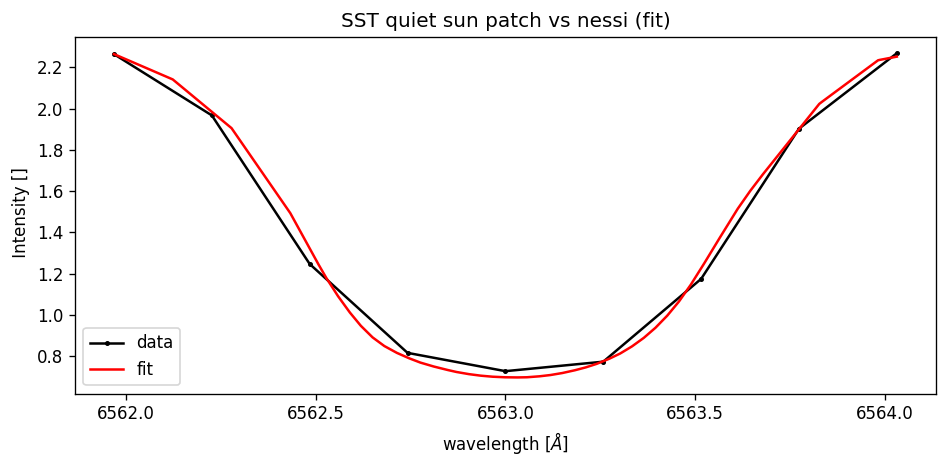

de p-waarde is  0.005344317529535927 
Chi^2 reduced= 18.382414123642796 
aantal vrijheidgraden= 6 
chi^2= 110.29448474185678
we behouden de fit tot op een betrouwbaarheidsniveau van  0.005344317529535927 
Oftewel verwerp als p-waarde <lpha-niveau 


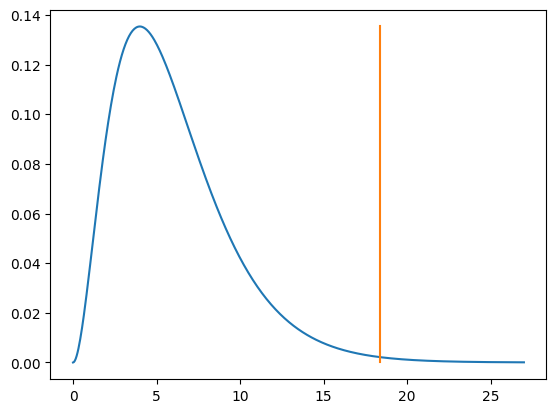

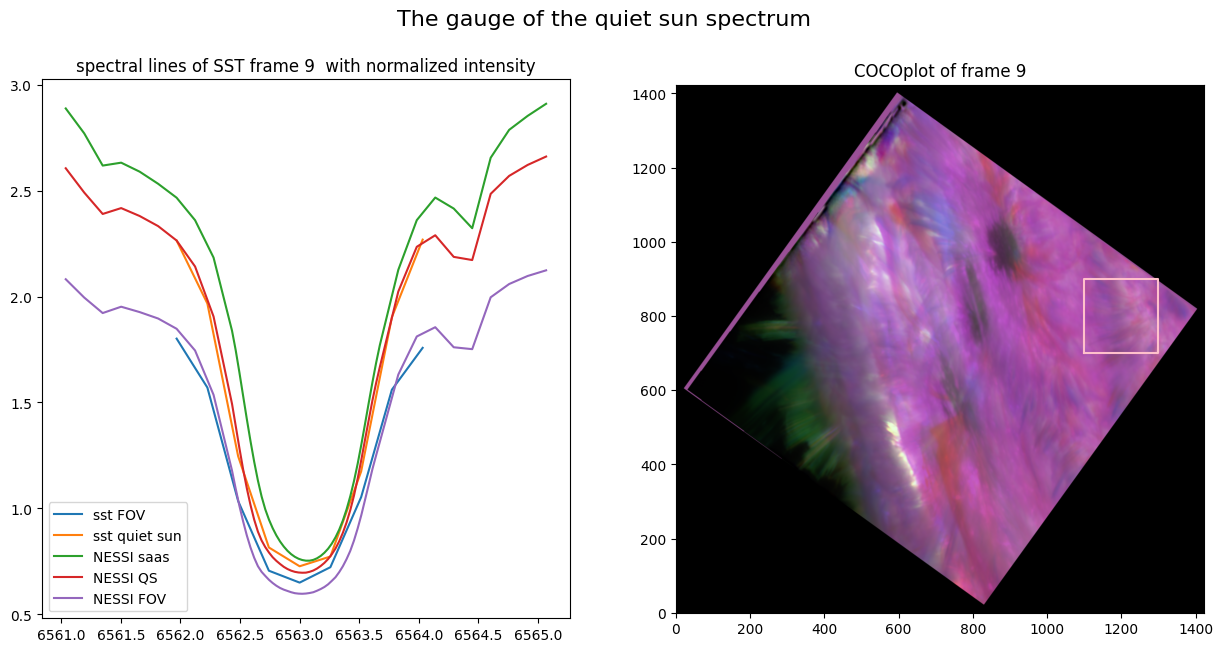

In [ ]:
fit_qs_to_NESSI(theor_Ha, Ha)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## How big should the flare be (assumption: linear scaling) to make a x% increase in the normal spectom in the line?

if integrated in the full disk spectrum the maximal deviation is  0.33018108405038493 %.


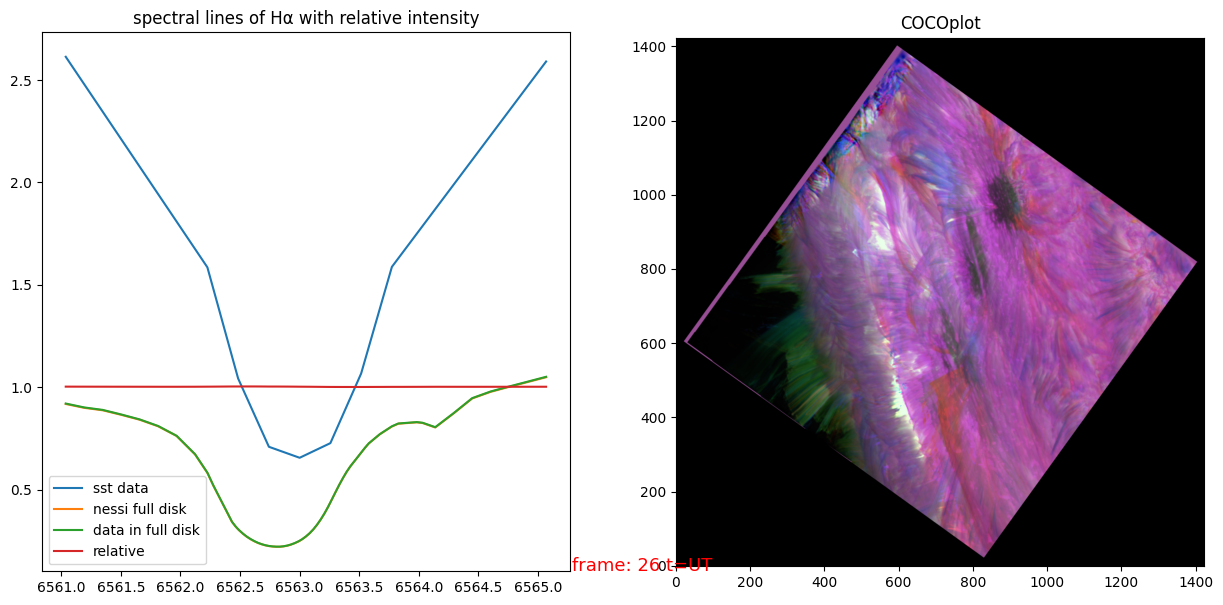

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
frame = 26

# line_sst, = ax[0].plot([], [], label='sst data')
# line_nessi, = ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc*theor_Ha.sst_clv[12] + theta[1], label='nessi mu = 0.76')
# line_quiet_sun, = ax[0].plot(Ha._wavel, Ha.quiet_spect, label='quiet sun spectr')
Ha.frame_integrated_spect(frame)
Ha.ccp_frame(frame,Show=False)


theor_line = theor_Ha
sst_data = Ha
wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])


f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect, kind='linear', fill_value="extrapolate")



# line_sst, = ax[0, 0].plot(sst_data._wavel, sst_data.av_spect, '--', label='sst data')
# ax[0, 0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1], label='nessi mu = 0.76')
# ax[0, 0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')



a=Ha.current_ccp
im = ax[1].imshow(Image.fromarray(a), origin='lower', interpolation='none', aspect='auto', vmin=0, vmax=1)

# Ha.ccp_frame(frame,Show=False)
Ha_tstr=(f"Ha t={Ha._time[frame][0:-7]} UT")

Ha_tstr=Ha_tstr[2:5]+Ha_tstr[7:15]+Ha_tstr[16:]
ax[1].text(-280,-15,"frame: "+str(frame)+Ha_tstr, fontsize=13, color='red')

ax[0].set_title("spectral lines of H\u03B1 with relative intensity")

ax[0].plot(wav, f_sst(wav), label='sst data')
# ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc*theor_Ha.sst_clv[12] + theta[1], label='nessi mu = 0.76')
ax[0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')

areafactor = 60**2 / (np.pi*950**2)

# f_sst_full = lambda theta : f_nessi(theta) + areafactor * (f_sst - f_nessi_clv(theta))
# f_relative = lambda theta : f_sst_full(theta) / f_nessi(theta)
sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))
relative = sst_full / f_nessi(theta)(wav)
print("if integrated in the full disk spectrum the maximal deviation is ",  (np.max(relative)-1)*100, '%.')
# print(f_nessi(theta)(wav), f_sst(wav) - f_nessi_clv(theta)(wav))

# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
areafactor_001 = np.max((f_sst(wav) - f_nessi_clv(theta)(wav))/f_nessi(theta)(wav))**-1 * 0.01
# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
areafactor_010 = areafactor_001 * 10

ax[0].plot(wav, sst_full , label='data in full disk')
ax[0].plot(wav, ((f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))) / f_nessi(theta)(wav)-1)*1+1, label='relative')

ax[0].legend(loc='lower left')
# ax[0].set_xlim([6561, 6565])
# ax[0].set_ylim([0.2, 1.5])
ax[1].imshow(Image.fromarray(Ha.current_ccp), origin='lower')
ax[1].set_title("COCOplot")
plt.show()

In [ ]:
print("The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.\n",
      areafactor_001, "\t\t this is an increase of ", areafactor_001/areafactor *100, "%",
      "\nThe area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.\n",
      areafactor_010, "\t\t this is an increase of ", areafactor_010/areafactor *100, "%",
      "\nThe real area ratio flare/full disk that the flare has\n", areafactor)

The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
 0.0038455036545735834 		 this is an increase of  302.8641095161491 % 
The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
 0.038455036545735836 		 this is an increase of  3028.6410951614907 % 
The real area ratio flare/full disk that the flare has
 0.001269712565386866


Assume now that the standard deviation is 0.2% of the spectrum than for the current flare to be detected as an increase in the H alpha line? 

## The full FOV integrated spectrum over time:

In [ ]:
sst_data = Ha
Ha.shape

(270, 1, 9, 1424, 1424)

In [ ]:
Ha.calculate__FOV_spect_over_time()

# Best possible interval

![image.png](attachment:image.png)
<!-- ![IMG_20231123_130152(2).jpg](attachment:IMG_20231123_130152(2).jpg) -->

The goal is to find the best signal to noise ratio of detecting a flare by giving an optimal interval. Here we look at 
$$\frac{1}{\sigma}\frac{\Delta I}{I} $$
where $\sigma$ is the standard deviation of the spectrum in the interval PER UNIT AREA!(with following two options):

- Looking for an area $A$ under the interval with with $\Delta x$ for each pixel en then taking $\sum \frac{1}{n-1} (A - \bar{A})^2$
- looking at the standard deviation of the all of the wavelength values then averaging over those used in the interval. 

Remark: this has to be done per unit area or per pixel. 

Here we will display the standard devation for the two regimes for the Halpha line

In [ ]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

D:\solar flares/data/2017-09-06\use_nessi3.py:1669: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube(frame)[(wav<= interval[1]) &
D:\solar flares/data/2017-09-06\use_nessi3.py:1660: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5
D:\solar flares/data/2017-09-06\use_nessi3.py:1657: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral,_ = scipy.integrate.quad(stc, interval[0], interval[1])


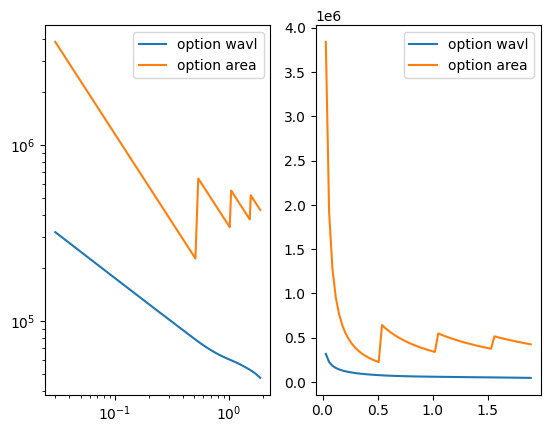

STD_Area = array([7681316.666499  , 3840658.3332495 , 1920329.16668297,
       1280219.44444237,  960164.58332693,  768131.66666853,
        640109.72222119,  548665.47619276,  480082.2916671 ,
        426739.81481412,  384065.83333426,  349150.75757583,
        320054.86111059,  295435.2564107 ,  274332.73809519,
        256043.88888847,  240041.14583355,  225921.07843128,
        643301.6782397 ,  609443.69517575,  578971.51041632,
        551401.43849276,  526337.73674254,  503453.48731847,
        482476.25868099,  463177.20833333,  445362.70032014,
        428867.7854941 ,  413551.07886898,  399290.69683871,
        385981.0069446 ,  373530.00672031,  361857.19401075,
        350891.82449503,  340571.47671554,  549073.2738099 ,
        533821.23842596,  519393.63738712,  505725.38377219,
        492758.06623929,  480439.11458304,  468721.08739854,
        457561.06150786,  446920.10658884,  436762.83143949,
        427056.99074063,  417773.14311618,  408884.35283692,
        40036

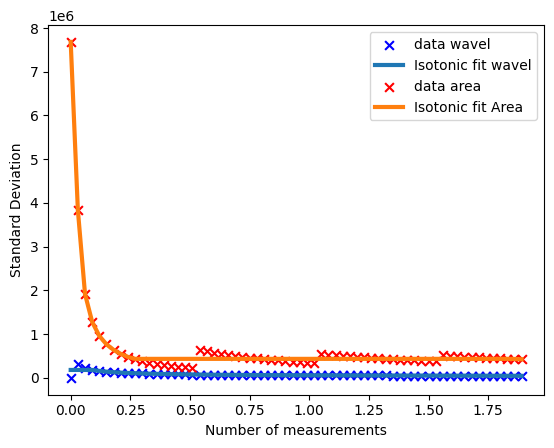

D:\solar flares/data/2017-09-06\use_nessi3.py:1734: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.54\AA$.
at an intesity of 8.15864470588508e-11. For a standard deviation of 435726.8045195411.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=0.54\AA$.
at an intesity of 4.67174956230129e-10. For a standard deviation of 76094.40830459293.



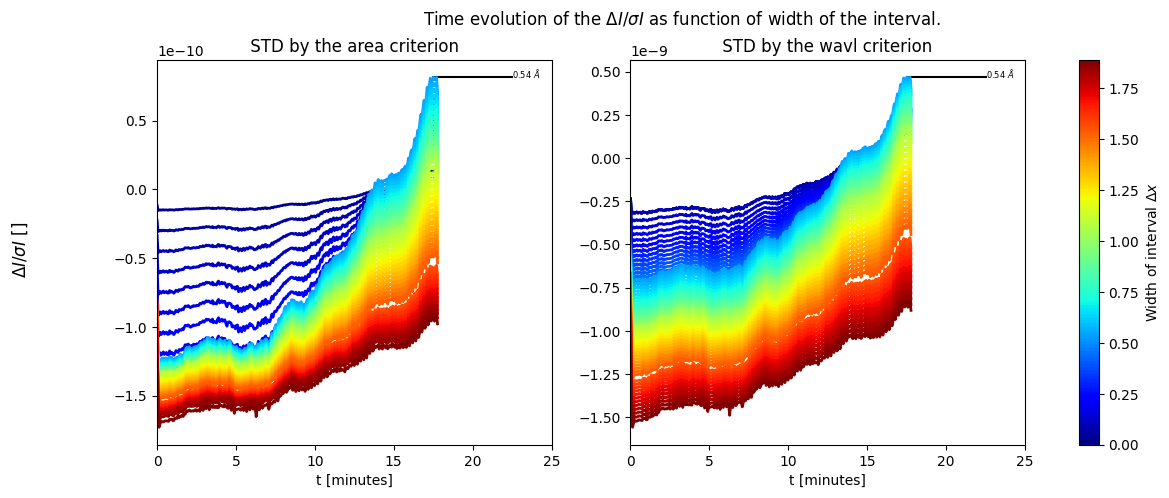

D:\solar flares/data/2017-09-06\use_nessi3.py:1902: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


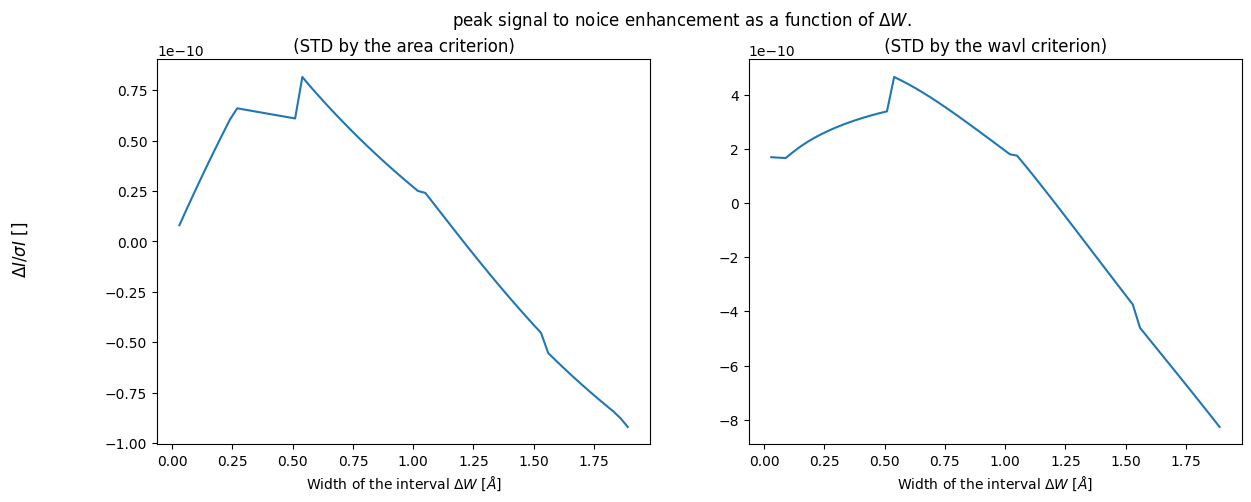

Directory 'line_data/optimal_width' already exists.


(array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [-1.08349781e-11, -1.53776302e-11, -1.51442027e-11, ...,
          7.04172230e-12,  6.83972894e-12,  6.70811122e-12],
        [-2.16408222e-11, -3.07336724e-11, -3.02900725e-11, ...,
          1.40103460e-11,  1.36225019e-11,  1.32807862e-11],
        ...,
        [-1.20188675e-10, -1.65015387e-10, -1.67559974e-10, ...,
         -8.47474057e-11, -8.42374344e-11, -9.11959190e-11],
        [-1.26124824e-10, -1.66948163e-10, -1.69465508e-10, ...,
         -8.81402051e-11, -8.76532198e-11, -9.45346011e-11],
        [-1.33505341e-10, -1.70564870e-10, -1.73078166e-10, ...,
         -9.24220293e-11, -9.19534965e-11, -9.88289832e-11]]),
 array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [-2.28421919e-10, -3.24189651e-10, -3.19268557e-10, ...,
          1.48452881e-10,  1.44194477e

In [ ]:
reload(un)
un.analyse_optimal_interval(sst_data=Ha, Deltas=np.arange(0,1.9, 0.03))

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

[2.26388501 1.96699655 1.24668098 0.81592673 0.72727367 0.77321634
 1.17454021 1.90260878 2.26843199] [1.84769349 1.6060744  1.04018899 0.66384358 0.59799103 0.6521638
 0.96579178 1.52154558 1.8253732 ] [0.41619153 0.36092215 0.20649198 0.15208314 0.12928264 0.12105255
 0.20874843 0.38106321 0.44305879]


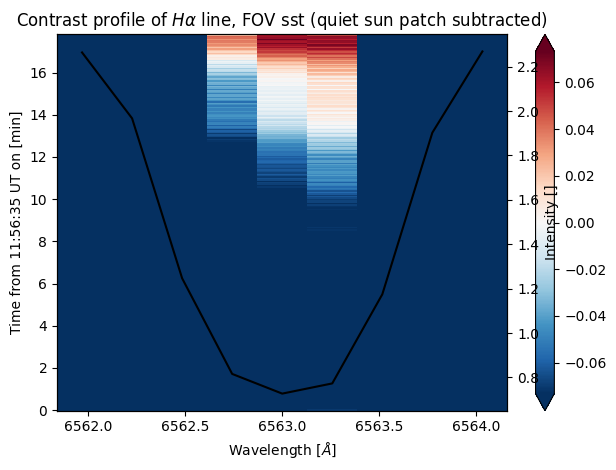

In [ ]:
FOV_spectrum = Ha.FOV_spectrum
QS = sst_data.quiet_spect
QS2 = theor_line.adapted_fov_spectr()(sst_data._wavel)
print(QS, QS2, QS - QS2)
Z = FOV_spectrum - QS
x = sst_data._wavel
y = Ha.TIME
TIME = y
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (quiet sun patch subtracted)')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

For FOV with Nessi normalisation (of course fit to the quiet sun patch)

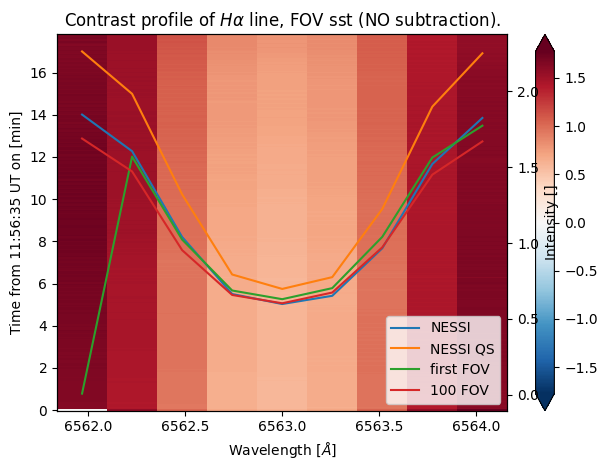

In [ ]:
theor_line = theor_Ha

f_nessi_clv = theor_line.adapted_fov_spectr()
sst_data = Ha
QS = f_nessi_clv(sst_data._wavel)

Z = FOV_spectrum 
x = sst_data._wavel
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (NO subtraction).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, label="NESSI")
ax2.plot(x,theor_Ha.adapted_qs_spectr()(x), label="NESSI QS")
ax2.plot(x,Z[0], label="first FOV")
ax2.plot(x,Z[100], label="100 FOV")
ax2.legend()
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

[-1.82979063  0.0046552   1.17647059]
[[0.00695828 1.5703866  1.02308825 ... 1.04118714 1.56431009 1.77436019]
 [1.6272556  1.42899919 0.94076675 ... 0.96168287 1.42138089 1.60147098]
 [1.62226894 1.42399833 0.93984196 ... 0.95143858 1.41141747 1.60818717]
 ...
 [1.68278468 1.53196718 1.12847992 ... 1.07120772 1.4253543  1.56557718]
 [1.67439978 1.53215136 1.13331324 ... 1.07335158 1.42360033 1.57082247]
 [1.66329037 1.53560649 1.11359091 ... 1.05193973 1.41580974 1.55564895]] [1.84769349 1.6060744  1.04018899 0.66384358 0.59799103 0.6521638
 0.96579178 1.52154558 1.8253732 ]


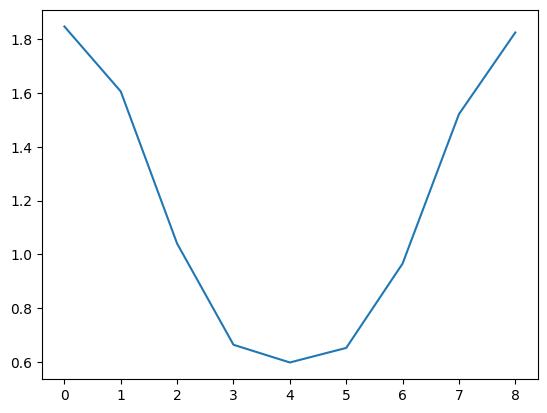

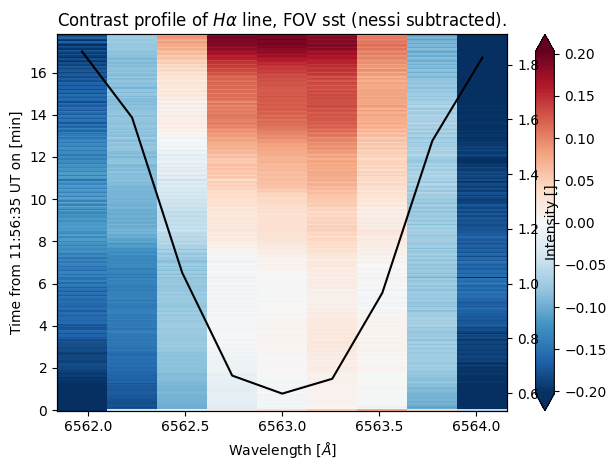

In [ ]:
theta = theor_Ha.theta
print(theta)
theor_line = theor_Ha

sst_data = Ha
QS = theor_Ha.adapted_fov_spectr()(sst_data._wavel)
plt.plot(QS)
print(FOV_spectrum, QS)
Z = FOV_spectrum - QS
x = sst_data._wavel
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, FOV sst (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,QS, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

The longer stripes here on the contrast plot come from the differences between nessi en quiet sun which was not an as good fit as hoped

### For the full disk profile

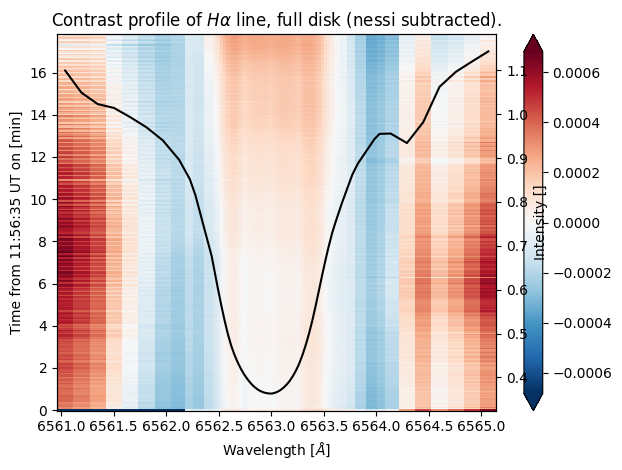

In [ ]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]
theor_line = theor_Ha
sst_data = Ha

wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])



areafactor = 60**2 / (np.pi*950**2)


# relative = sst_full / f_nessi(theta)(wav)


QS_clv = theor_Ha.adapted_fov_spectr()(wav)


Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_clv)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
y = TIME
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (nessi subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

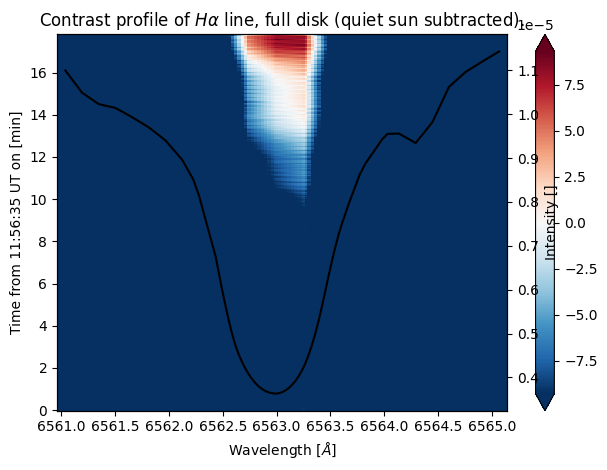

In [ ]:
theta = [ 1.750e-01,  1.487e-01,  9.732e-01]
theor_line = theor_Ha
sst_data = Ha

wav = un.merge_wavelengths(sst_data._wavel, theor_line.sst_wav+ sst_data.theta_nessi_to_quiet_sun[0])

f_sun_patch_clv = interp1d(sst_data._wavel, sst_data.quiet_spect, kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(sst_data._wavel, sst_data.av_spect, kind='linear', fill_value="extrapolate")

QS_from_qs_patch = f_sun_patch_clv(wav)

sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - QS_from_qs_patch)

Z_full_disk = np.array([areafactor*(interp1d(sst_data._wavel, FOV_spectrum[i], kind='linear', fill_value="extrapolate")(wav) - QS_from_qs_patch)
                        for i in range(np.shape(FOV_spectrum)[0])])
x = wav
X, Y = np.meshgrid(x, y)
# print(X,Y)

fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                        norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-1.0, vmax=1.0, base=10),
#                        cmap='RdBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='both')


pcm = ax.pcolormesh(X, Y, Z_full_disk, cmap='RdBu_r', vmin=-np.max(Z_full_disk), shading='auto')
fig.colorbar(pcm, ax=ax, extend='both')
ax.set_title(r'Contrast profile of $H\alpha$ line, full disk (quiet sun subtracted).')
ax.set_ylabel('Time from 11:56:35 UT on [min]')
ax.set_xlabel(r'Wavelength [$\AA$]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
ax2.plot(x,f_nessi(theta)(wav), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Equivalent width

The frame integrated spectrum:
$$f(t,\lambda,A) = \int_A I(t,\lambda,\vec{x})d\vec{x}$$

weight against a continuum wavelength
$$F(t,\lambda,A) = \frac{f(t,\lambda,A)}{f(t,\lambda_\text{cont},A)} \times f(t_0,\lambda_\text{cont},A)$$

Target Region wieghted against a quiet region to find relative intensity
$$F_{TR}(t, \lambda) = \frac{F(t,\lambda,A = TR)}{F(t,\lambda,A = QR)} \times F(t_0,\lambda,A=QR)$$
This we do both with the scalar multiplication to find relative intensities

The difference in spectrum in time (we do spectrum - quiet sun)
$$\Delta F=  F_{TR}(t,\lambda) - F_{TR}(t_0,\lambda)$$

weighing it again against a reference intensity. (We incorporate this is the scalar weight)
$$\Delta S(t,\lambda) = \Delta F_{TR}(t,\lambda)/F(t_0,\lambda_\text{cont},A=\text{ full disk})$$

The equivalent width is defind as the integral over the resulting normalized pre-event-subtracted H$\alpha$ spectrum
$\Delta S(t, \lambda)$ represents the ratio of the spectral changes coming from
active events to the solar irradiance (full-disk continuum). 
$$ \Delta EW_{H\alpha \pm \Delta \lambda } = \int_{H\alpha - \Delta \lambda}^{H\alpha + \Delta \lambda} \Delta S(t,\lambda ) d\lambda $$ 


To obtain something analogous (or even maybe equivalent although only a function of the line center.) We could integrate over the difference of NESSI+sst - NESSI.








In [ ]:
import scipy

def differenced_equivalent_width(sst_data, f_nessi_theta, f_nessi_clv_theta, wav, Dlambda):

    line_center = wav[np.where(f_nessi_theta(wav) == np.min(f_nessi_theta(wav)))[0][0]]
    interval = [line_center-Dlambda, line_center+Dlambda]

    DEW = []

    for frame in range(sst_data._number_of_frames):
        DS = areafactor * (interp1d(sst_data._wavel, sst_data.FOV_spectrum[frame])(wav) - f_nessi_clv_theta(wav))

        x, restx = un.restrict_intervalx2(interval, wav)

        DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))

    return DEW


The equivalent width calculated in its difference to nessi 

The equivalent width calculated in its difference to the quiet sun patch

## maybe centroid analysis between nessi + sst and harps ?

# The different footprints of flare things in its spectrum

- Ribbon area to some of the line increases.
- adding spectrum of differnt places to the movies
- flare area
- ...

# What if the flare was 10 times bigger?

bring it to the disk center scale it en than put it on its spot again wit center to limb variation

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [ ]:
reload(un)
un.save_for_further_analysis(Ha, theor_Ha)
